# EE2211 Finals Code

For Chapters 4 to 9 of EE2211 Introduction to Machine Learning, a course taught at the National University of Singapore (NUS). 

4. Systems of Linear Equations
5. Least Squares, Linear Regression
6. Ridge Regression, Polynomial Regression
7. Overfitting, Bias/Variance Trade-off
8. Optimisation, Gradient Descent
9. Decision Trees, Random Forest

Compiled and written by Roderick Kong in 2025, with reference to materials from said course.

In [250]:
# Import statements (run this cell first)
import numpy as np
from numpy.linalg import matrix_rank, det, inv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Matrix Basics

### Rank of Matrix

In [251]:
X = np.array([[1, 4, 3], [0, 4, 2], [1, 8, 5]])
print("Rank of X =")
print(matrix_rank(X))

Rank of X =
2


### Determinant of Matrix

In [252]:
X = np.array([[1, 4, 3], [0, 4, 2], [1, 8, 5]])
print("det(X) =")
print(det(X))

det(X) =
0.0


### Matrix Inverse

In [253]:
X = np.array([[1, 4, 3], [0, 4, 2], [3, -2, 9]])
print("X⁻¹ =")
print(inv(X))

X⁻¹ =
[[ 1.42857143e+00 -1.50000000e+00 -1.42857143e-01]
 [ 2.14285714e-01 -1.78428700e-17 -7.14285714e-02]
 [-4.28571429e-01  5.00000000e-01  1.42857143e-01]]


### Check if Left Invertible

In [254]:
X = np.array([[1, 4, 2], [-3, 10, 5], [1, 2, 3], [4, 5, 6]])
XTX = X.T @ X
print("det(XᵀX) =")
print(det(XTX))

if det(XTX) != 0:
    print("X is left invertible")
    print("(XᵀX)⁻¹Xᵀ =")
    print(inv(X.T @ X) @ X.T)
else:
    print("X is not left invertible")

det(XᵀX) =
11006.000000000036
X is left invertible
(XᵀX)⁻¹Xᵀ =
[[ 0.32073415 -0.14464837 -0.19080502  0.10903144]
 [ 0.33000182  0.01944394 -0.23314556 -0.00963111]
 [-0.4528439   0.07023442  0.37279666  0.07268762]]


### Check if Right Invertible

In [255]:
X = np.array([[1, 4, 2], [-3, 10, 5]])
XXT = X @ X.T
print("det(XXᵀ) =")
print(det(XXT))

if det(XXT) != 0:
    print("X is right invertible")
    print("Xᵀ(XXᵀ)⁻¹ =")
    print(X.T @ inv(X @ X.T))
else:
    print("X is not right invertible")

det(XXᵀ) =
604.9999999999997
X is right invertible
Xᵀ(XXᵀ)⁻¹ =
[[ 0.45454545 -0.18181818]
 [ 0.10909091  0.03636364]
 [ 0.05454545  0.01818182]]


# System of Linear Equations

### System of Linear Equations (automated)

In [256]:
X = np.array([[1, 4, 2], [0, 4, 3], [3, 4, 9]])
y = np.array([39, 40, 50])

if X.shape[1] > X.shape[0]:
    print("Under-determined, m < d, right inverse Xᵀ(XXᵀ)⁻¹")
    w = X.T @ inv(X @ X.T) @ y
elif X.shape[1] < X.shape[0]:
    print("Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ")
    w = (inv(X.T @ X) @ X.T) @ y
else:
    print("Even-determined, m = d, X⁻¹")
    w = inv(X) @ y
    
print("w =")
print(w)

Even-determined, m = d, X⁻¹
w =
[0.44444444 8.91666667 1.44444444]


### System of Linear Equations (even-determined, m = d)

In [257]:
X = np.array([[1, 4, 2], [0, 4, 3], [3, 4, 9]])
y = np.array([39, 40, 50])
w = inv(X) @ y
print("w =")
print(w)

w =
[0.44444444 8.91666667 1.44444444]


### System of Linear Equations (over-determined, m > d)

In [258]:
X = np.array([[1, 1], [1, -1], [1, 0]])
y = np.array([1, 0, 2])
w = inv(X.T @ X) @ X.T @ y
print("ŵ =")
print(w)

ŵ =
[1.  0.5]


### System of Linear Equations (under-determined, m < d)

In [259]:
X = np.array([[1, 2, 3], [1, -2, 3]])
y = np.array([2, 1])
w = X.T @ inv(X @ X.T) @ y
print("ŵ =")
print(w)

ŵ =
[0.15 0.25 0.45]


# Linear Regression

## Linear Regression

### Linear Regression (automated)

In [260]:
# Remember to add the first column of '1's for bias for X!
X = np.array([[1, 1, 0, 1], [1, 2, -1, 1], [1, 1, 1, 5]])
Y = [[1], [2], [3]]

if X.shape[1] > X.shape[0]:
    print("Under-determined, m < d, right inverse Xᵀ(XXᵀ)⁻¹")
    W = X.T @ inv(X @ X.T) @ Y
else:
    print("Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ")
    W = (inv(X.T @ X) @ X.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[1, -1, 2, 8], [1, 1, 5, -1]])
Y_test = X_test @ W
print("Y_test =")
print(Y_test)
print()

# Calculate mean-squared error
Y_predicted = X @ W
print("MSE =")
print(mean_squared_error(Y_predicted, Y))

Under-determined, m < d, right inverse Xᵀ(XXᵀ)⁻¹
Ŵ =
[[-0.14285714]
 [ 0.52380952]
 [-0.47619048]
 [ 0.61904762]]

Y_test =
[[ 3.33333333]
 [-2.61904762]]

MSE =
5.423418723394456e-31


### Linear Regression (over-determined, m > d, left inverse)

In [261]:
# Remember to add the first column of '1's for bias for X!
X = np.array([[1, 1, 1], [1, -1, 1], [1, 1, 3], [1, 1, 0]])
Y = np.array([[1, 0], [0, 1], [2, -1], [-1, 3]])
W = inv(X.T @ X) @ X.T @ Y  # Use left inverse (XᵀX)⁻¹Xᵀ
print("Ŵ =")
print(w)
print()

# Predict Y based on new X
X_test = np.array([[1, 6, 8], [1, 0, -1]])
Y_test = X_test @ W
print("Y_test =")
print(Y_test)
print()

# Calculate mean-squared error
Y_predicted = X @ W
print("MSE =")
print(mean_squared_error(Y_predicted, Y))

Ŵ =
[0.15 0.25 0.45]

Y_test =
[[ 7.75       -7.25      ]
 [-1.67857143  3.46428571]]

MSE =
0.30357142857142855


### Linear Regression (under-determined, m < d, right inverse)

In [262]:
# Remember to add the first column of '1's for bias for X!
X = np.array([[1, 1, 0, 1], [1, 2, -1, 1], [1, 1, 1, 5]])
Y = [[1], [2], [3]]
W = X.T @ inv(X @ X.T) @ Y  # Use right inverse Xᵀ(XXᵀ)⁻¹
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[1, -1, 2, 8], [1, 1, 5, -1]])
Y_test = X_test @ W
print("Y_test =")
print(Y_test)
print()

# Calculate mean-squared error
Y_predicted = X @ W
print("MSE =")
print(mean_squared_error(Y_predicted, Y))

Ŵ =
[[-0.14285714]
 [ 0.52380952]
 [-0.47619048]
 [ 0.61904762]]

Y_test =
[[ 3.33333333]
 [-2.61904762]]

MSE =
5.423418723394456e-31


## Linear Regression for Classification

### Binary Classification (automated, linear regression)

In [263]:
# Remember to add the first column of '1's for bias for X!
X = np.array([[1, -9], [1, -7], [1, -5], [1, 1], [1, 5], [1, 9]])
y = np.array([[-1], [-1], [-1], [1], [1], [1]])

# Linear regression
if X.shape[1] > X.shape[0]:
    print("Under-determined, m < d, right inverse Xᵀ(XXᵀ)⁻¹")
    w = X.T @ inv(X @ X.T) @ y
else:
    print("Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ")
    w = (inv(X.T @ X) @ X.T) @ y
print("ŵ =")
print(w)
print()

# Predict Y based on new X
X_test = np.array([[1, -2]])
y_test = X_test @ w
y_test_class = np.sign(y_test)
print("y_test_class =")
print(y_test_class)

Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ
ŵ =
[[0.140625]
 [0.140625]]

y_test_class =
[[-1.]]


### Multi-class Classification (automated, one-hot encoding, linear regression)

In [264]:
# Remember to add the first column of '1's for bias for X!
X = np.array([[1, -1], [1, 0], [1, 0.5], [1, 0.3], [1, 0.8]])
Y = np.array([[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0]])

# Uncomment to use OneHotEncoder
# Y_class = np.array([[1], [1], [2], [3], [2]])
# onehot_encoder = OneHotEncoder(sparse_output=False)
# Y = onehot_encoder.fit_transform(Y_class)

# Linear regression
if X.shape[1] > X.shape[0]:
    print("Under-determined, m < d, right inverse Xᵀ(XXᵀ)⁻¹")
    W = X.T @ inv(X @ X.T) @ Y
else:
    print("Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ")
    W = (inv(X.T @ X) @ X.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[1, -0.1], [1, 0.4]])
Y_test = X_test @ W
Y_test_class = [[1 if y == max(x) else 0 for y in x] for x in Y_test]
print("Y_test_class =")
print(Y_test_class)

Over-determined, m > d, left inverse (XᵀX)⁻¹Xᵀ
Ŵ =
[[ 0.47798742  0.33333333  0.18867925]
 [-0.64989518  0.55555556  0.09433962]]

Y_test_class =
[[1, 0, 0], [0, 1, 0]]


# Polynomial Regression

## Polynomial Regression

### Count Number of Parameters Needed for Polynomial Regression

In [265]:
number_of_features = 2
order = 3

X = np.array([[1] * number_of_features])
# Generate polynomial features
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print(f'Number of parameter(s) needed for {number_of_features} feature(s) and order {order} = {P.shape[1]}')

P =
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Number of parameter(s) needed for 2 feature(s) and order 3 = 10


### Polynomial Regression (automated)

In [266]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([[-10], [-8], [-3], [-1], [2], [8]])
Y = np.array([[5], [5], [4], [3], [2], [2]])

# Generate polynomial features
order = 3
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Polynomial regression
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ)⁻¹")
    W = P.T @ inv(P @ P.T) @ Y
else:
    print("Use primal solution, m > d, left inverse (PᵀP)⁻¹Pᵀ")
    W = (inv(P.T @ P) @ P.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[9]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ W
print("Y_test =")
print(Y_test)

P =
[[    1.   -10.   100. -1000.]
 [    1.    -8.    64.  -512.]
 [    1.    -3.     9.   -27.]
 [    1.    -1.     1.    -1.]
 [    1.     2.     4.     8.]
 [    1.     8.    64.   512.]]

Use primal solution, m > d, left inverse (PᵀP)⁻¹Pᵀ
Ŵ =
[[ 2.68935636]
 [-0.37722517]
 [ 0.01343815]
 [ 0.00285772]]

Y_test =
[[2.46609771]]


## Polynomial Regression for Classification

### Binary Classification (automated, polynomial regression)

In [267]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([[-1], [-1], [1], [1]])

# Generate polynomial features
order = 2
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Polynomial regression
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ)⁻¹")
    w = P.T @ inv(P @ P.T) @ y
else:
    print("Use primal solution, m > d, left inverse (PᵀP)⁻¹Pᵀ")
    w = (inv(P.T @ P) @ P.T) @ y
print("ŵ =")
print(w)
print()

# Predict Y based on new X
X_test = np.array([[0.1, 0.1], [0.9, 0.9], [0.1, 0.9], [0.9, 0.1]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ w
print("y_test_class =")
print(np.sign(Y_test))

P =
[[1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1.]]

Use dual solution, m < d, right inverse Pᵀ(PPᵀ)⁻¹
ŵ =
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-4.]
 [ 1.]]

y_test_class =
[[-1.]
 [-1.]
 [ 1.]
 [ 1.]]


### Multi-class Classification (automated, one-hot encoding, polynomial regression)

In [268]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([[-1], [0], [0.5], [0.3], [0.8]])
Y = np.array([[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0]])

# Uncomment to use OneHotEncoder
# Y_class = np.array([[1], [1], [2], [3], [2]])
# onehot_encoder = OneHotEncoder(sparse_output=False)
# Y = onehot_encoder.fit_transform(Y_class)

# Generate polynomial features
order = 5
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Polynomial regression
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ)⁻¹")
    W = P.T @ inv(P @ P.T) @ Y
else:
    print("Use primal solution, m > d, left inverse (PᵀP)⁻¹Pᵀ")
    W = (inv(P.T @ P) @ P.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[-0.1], [0.4]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ W
Y_test_class = [[1 if y == max(x) else 0 for y in x] for x in Y_test]
print("Y_test_class =")
print(Y_test_class)

P =
[[ 1.      -1.       1.      -1.       1.      -1.     ]
 [ 1.       0.       0.       0.       0.       0.     ]
 [ 1.       0.5      0.25     0.125    0.0625   0.03125]
 [ 1.       0.3      0.09     0.027    0.0081   0.00243]
 [ 1.       0.8      0.64     0.512    0.4096   0.32768]]

Use dual solution, m < d, right inverse Pᵀ(PPᵀ)⁻¹
Ŵ =
[[ 1.00000000e+00  1.06581410e-14 -5.68434189e-14]
 [-5.30313768e+00 -3.70234958e+00  9.00548727e+00]
 [ 5.21976232e+00  1.08728407e+01 -1.60926030e+01]
 [ 6.66624941e+00  9.46978846e+00 -1.61360379e+01]
 [-6.47651463e+00 -1.29098961e+01  1.93864107e+01]
 [-2.61986403e+00 -7.80449422e+00  1.04243583e+01]]

Y_test_class =
[[1, 0, 0], [0, 0, 1]]


# Ridge Regression

## Ridge Regression

### Ridge Regression (automated, polynomial regression with L2 regularisation)

In [269]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([[1, 0, 1], [1, -1, 1]])
Y = np.array([[0], [1]])

# Generate polynomial features
order = 3
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Ridge regression
reg = 0.0001  # Lambda
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹")
    W = P.T @ inv(P @ P.T + reg * np.eye(P.shape[0])) @ Y
else:
    print("Use primal solution, m > d, left inverse (PᵀP + λI)⁻¹Pᵀ")
    W = (inv(P.T @ P + reg * np.eye(P.shape[1])) @ P.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[1, 0, 0], [-1, 1, 1]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ W
print("Y_test =")
print(Y_test)

P =
[[ 1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.
   0.  1.]
 [ 1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
  -1.  1.]]

Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹
Ŵ =
[[ 9.99970001e-07]
 [ 9.99970001e-07]
 [-9.99980000e-02]
 [ 9.99970001e-07]
 [ 9.99970001e-07]
 [-9.99980000e-02]
 [ 9.99970001e-07]
 [ 9.99980000e-02]
 [-9.99980000e-02]
 [ 9.99970001e-07]
 [ 9.99970001e-07]
 [-9.99980000e-02]
 [ 9.99970001e-07]
 [ 9.99980000e-02]
 [-9.99980000e-02]
 [ 9.99970001e-07]
 [-9.99980000e-02]
 [ 9.99980000e-02]
 [-9.99980000e-02]
 [ 9.99970001e-07]]

Y_test =
[[ 3.99988e-06]
 [-1.99994e-01]]


## Ridge Regression for Classification

### Binary Classification (automated, polynomial regression with L2 regularisation)

In [270]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([ [0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([[-1], [-1], [1], [1]])

# Generate polynomial features
order = 2
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Ridge regression
reg = 0.0001  # Lambda
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹")
    W = P.T @ inv(P @ P.T + reg * np.eye(P.shape[0])) @ y
else:
    print("Use primal solution, m > d, left inverse (PᵀP + λI)⁻¹Pᵀ")
    W = (inv(P.T @ P + reg * np.eye(P.shape[1])) @ P.T) @ y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[0.1, 0.1], [0.9, 0.9], [0.1, 0.9], [0.9, 0.1]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ w
print("y_test_class =")
print(np.sign(Y_test))

P =
[[1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1.]]

Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹
Ŵ =
[[-0.9993004 ]
 [ 0.99940033]
 [ 0.99940033]
 [ 0.99940033]
 [-3.99790115]
 [ 0.99940033]]

y_test_class =
[[-1.]
 [-1.]
 [ 1.]
 [ 1.]]


### Multi-class Classification (automated, one-hot encoding, polynomial regression with L2 regularisation)

In [271]:
# NO NEED to add the first column of '1's for bias for X, already done in PolynomialFeatures()!
X = np.array([[-1], [0], [0.5], [0.3], [0.8]])
Y = np.array([[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0]])

# Uncomment to use OneHotEncoder
# Y_class = np.array([[1], [1], [2], [3], [2]])
# onehot_encoder = OneHotEncoder(sparse_output=False)
# Y = onehot_encoder.fit_transform(Y_class)

# Generate polynomial features
order = 5
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)
print("P =")
print(P)
print()

# Ridge regression
reg = 0.0001  # Lambda
if P.shape[1] > P.shape[0]:
    print("Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹")
    W = P.T @ inv(P @ P.T + reg * np.eye(P.shape[0])) @ Y
else:
    print("Use primal solution, m > d, left inverse (PᵀP + λI)⁻¹Pᵀ")
    W = (inv(P.T @ P + reg * np.eye(P.shape[1])) @ P.T) @ Y
print("Ŵ =")
print(W)
print()

# Predict Y based on new X
X_test = np.array([[-0.1], [0.4]])
P_test = poly.fit_transform(X_test)
Y_test = P_test @ W
Y_test_class = [[1 if y == max(x) else 0 for y in x] for x in Y_test]
print("Y_test_class =")
print(Y_test_class)

P =
[[ 1.      -1.       1.      -1.       1.      -1.     ]
 [ 1.       0.       0.       0.       0.       0.     ]
 [ 1.       0.5      0.25     0.125    0.0625   0.03125]
 [ 1.       0.3      0.09     0.027    0.0081   0.00243]
 [ 1.       0.8      0.64     0.512    0.4096   0.32768]]

Use dual solution, m < d, right inverse Pᵀ(PPᵀ + λI)⁻¹
Ŵ =
[[  0.98693729  -0.02087626   0.03384032]
 [ -4.83565183  -2.87757893   7.71371153]
 [  4.31890072   9.25917207 -13.57848966]
 [  5.78832959   7.90696347 -13.69590392]
 [ -5.34563142 -10.88193347  16.22813391]
 [ -1.99277359  -6.67347443   8.66643163]]

Y_test_class =
[[1, 0, 0], [0, 0, 1]]


# Gradient Descent

### General Gradient Descent

Gradient Descent Formula:

Initialise **x₀** and learning rate η

**while** true **do**

&nbsp;&nbsp;&nbsp;&nbsp;Compute **x**ₖ₊₁ ← **x**ₖ - η▽ₓg(**x**ₖ)

&nbsp;&nbsp;&nbsp;&nbsp;**if** converge **then**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** **x**ₖ₊₁

&nbsp;&nbsp;&nbsp;&nbsp;**end**

**end**

In [272]:
x_0 = -1
learning_rate = 0.9
number_of_iterations = 5

# Taking g(x) = x² => g'(x) = 2x
def g(x):
    return x ** 2

def g_prime(x):
    return 2 * x

x_list = [x_0]
gx_list = [g(x_0)]
x = x_0
for iteration in range(number_of_iterations):
    x -= learning_rate * g_prime(x)
    gx = g(x)
    x_list.append(x)
    gx_list.append(gx)

for iteration in range(number_of_iterations + 1):
    print(f'After {iteration} iteration(s):')
    print(f'x = {x_list[iteration]}')
    print(f'g(x) = {gx_list[iteration]}\n')

After 0 iteration(s):
x = -1
g(x) = 1

After 1 iteration(s):
x = 0.8
g(x) = 0.6400000000000001

After 2 iteration(s):
x = -0.6400000000000001
g(x) = 0.4096000000000002

After 3 iteration(s):
x = 0.5120000000000002
g(x) = 0.26214400000000027

After 4 iteration(s):
x = -0.4096000000000002
g(x) = 0.16777216000000014

After 5 iteration(s):
x = 0.3276800000000002
g(x) = 0.10737418240000013



### Assignment 3 Code

In [273]:
'''
Given:
f₁(a) = a⁵ => f₁'(a) = 5a⁴
f₂(b) = sin²(b) => f₂'(b) = 2sin(b)cos(b) = sin(2b)
f₃(c, d) = c³ + d²sin(d) = 3c² + 2dsin(d) + d²cos(d)

Gradient descent formula: wₖ₊₁ ← wₖ - η▽C(wₖ)
'''

def A3_A0286550Y(learning_rate, num_iters):
    a = 2.5
    b = 0.5
    c = 2
    d = 4

    a_out = np.zeros(num_iters)
    f1_out = np.zeros(num_iters)
    b_out = np.zeros(num_iters)
    f2_out = np.zeros(num_iters)
    c_out = np.zeros(num_iters)
    d_out = np.zeros(num_iters)
    f3_out = np.zeros(num_iters)

    for iteration in range(num_iters):
        a -= learning_rate * 5 * a ** 4
        b -= learning_rate * np.sin(2 * b)
        c -= learning_rate * 3 * c ** 2
        d -= learning_rate * (2 * d * np.sin(d) + d ** 2 * np.cos(d))
        a_out[iteration] = a
        b_out[iteration] = b
        c_out[iteration] = c
        d_out[iteration] = d
        f1_out[iteration] = a ** 5
        f2_out[iteration] = np.sin(b) ** 2
        f3_out[iteration] = c ** 3 + d ** 2 * np.sin(d)

    # return in this order
    return a_out, f1_out, b_out, f2_out, c_out, d_out, f3_out

A3_A0286550Y(0.01, 10)

(array([0.546875  , 0.54240279, 0.53807508, 0.53388385, 0.52982169,
        0.52588176, 0.52205772, 0.5183437 , 0.51473425, 0.51122429]),
 array([0.04891481, 0.04694719, 0.04510393, 0.04337445, 0.04174925,
        0.04021986, 0.03877864, 0.03741874, 0.03613394, 0.03491865]),
 array([0.49158529, 0.4832627 , 0.47503353, 0.46689899, 0.45886014,
        0.45091796, 0.44307329, 0.43532688, 0.42767938, 0.42013131]),
 array([0.2228067 , 0.21591887, 0.20918573, 0.20260743, 0.19618383,
        0.1899146 , 0.18379913, 0.17783664, 0.17202612, 0.16636638]),
 array([1.88      , 1.773968  , 1.67955913, 1.59493156, 1.51861736,
        1.4494314 , 1.38640586, 1.32874222, 1.27577555, 1.22694745]),
 array([4.16512718, 4.32653555, 4.47715292, 4.61094906, 4.724224  ,
        4.81606055, 4.88786162, 4.94241001, 4.98296068, 5.01262818]),
 array([ -8.16993964, -11.76003964, -14.75494877, -17.09435979,
        -18.81449606, -20.02486635, -20.85948129, -21.43806897,
        -21.85008559, -22.15538262]))

# Metrics for Regression/Feature Selection

### Mean Squared Error (MSE)

In [274]:
y = [0.2758, 1.4392, -0.4611, 0.6154, 1.0006]
y_pred = [0.27, 1.44, -0.46, 0.62, 1.00]

mean_squared_error(y, y_pred)

1.1401999999999975e-05

### Pearson's r

In [275]:
feature_1 = [0.3510, 2.1812, 0.2415, -0.1096, 0.1544]
feature_2 = [1.1796, 2.1068, 1.7753, 1.2747, 2.0851]
feature_3 = [-0.9852, 1.3766, -1.3244, -0.6316, -0.8320]
y = [0.2758, 1.4392, -0.4611, 0.6154, 1.0006]

print(f'Correlation of Feature 1 & y = {pearsonr(feature_1, y)[0]}')
print(f'Correlation of Feature 2 & y = {pearsonr(feature_2, y)[0]}')
print(f'Correlation of Feature 3 & y = {pearsonr(feature_3, y)[0]}')

Correlation of Feature 1 & y = 0.5987722845227617
Correlation of Feature 2 & y = 0.45369218508997855
Correlation of Feature 3 & y = 0.8008916458435773


# Decision Trees

### Decision Tree Regressor

X_test =
[[0.6 1. ]
 [1.  3. ]
 [2.  5. ]
 [3.  4. ]
 [3.2 6. ]
 [3.8 7. ]
 [0.5 2. ]]

y_pred =
[0.28       0.28       0.28       0.69333333 0.69333333 0.69333333
 0.28      ]

y_test =
[0.23 0.28 0.42 0.53 0.75 0.8  0.19]


[Text(0.5, 0.75, 'x[0] <= 2.5\nsquared_error = 0.052\nsamples = 7\nvalue = 0.457'),
 Text(0.25, 0.25, 'squared_error = 0.008\nsamples = 4\nvalue = 0.28'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.014\nsamples = 3\nvalue = 0.693'),
 Text(0.625, 0.5, '  False')]

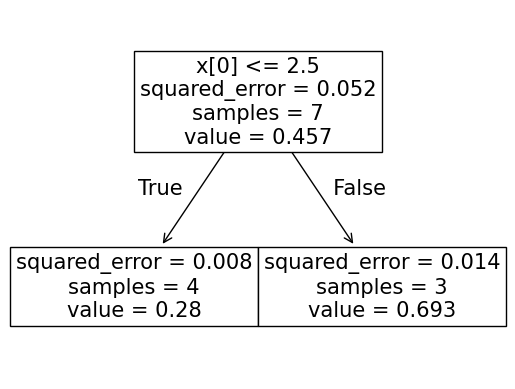

In [276]:
# Hyperparameters
CRITERION = 'squared_error'
MAX_DEPTH = 1
MIN_IMPURITY_DECREASE = 0

# Input
X_train = np.array([[0.6, 1], [1.0, 3], [2.0, 5], [3.0, 4], [3.2, 6], [3.8, 7], [0.5, 2]])
y_train = np.array([0.23, 0.28, 0.42, 0.53, 0.75, 0.80, 0.19])
X_test = np.array([[0.6, 1], [1.0, 3], [2.0, 5], [3.0, 4], [3.2, 6], [3.8, 7], [0.5, 2]])
y_test = np.array([0.23, 0.28, 0.42, 0.53, 0.75, 0.80, 0.19])

decision_tree = DecisionTreeRegressor(criterion=CRITERION, max_depth=MAX_DEPTH, min_impurity_decrease=MIN_IMPURITY_DECREASE)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print('X_test =')
print(X_test)
print()
print('y_pred =')
print(y_pred)
print()
print('y_test =')
print(y_test)
plot_tree(decision_tree)

### Decision Tree Classifier

X_test =
[[1.2 3.4]
 [2.5 1.8]
 [3.3 4.4]
 [0.5 2.2]
 [4.1 3. ]]

y_pred =
[0 1 0 1 0]

y_test =
[0 1 0 1 0]


[Text(0.5, 0.75, 'x[1] <= 2.6\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

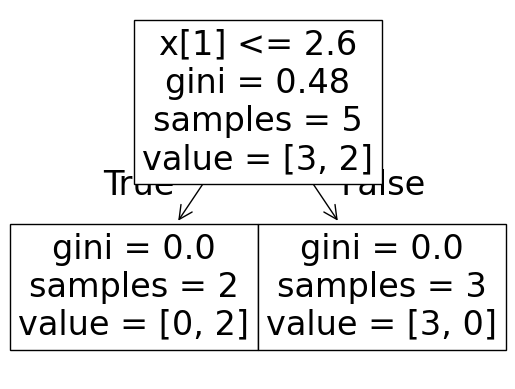

In [277]:
# Hyperparameters
CRITERION = 'gini'  # Or 'entropy'
MAX_DEPTH = 1
MIN_IMPURITY_DECREASE = 0

# Input
X_train = np.array([
    [1.2, 3.4],
    [2.5, 1.8],
    [3.3, 4.4],
    [0.5, 2.2],
    [4.1, 3.0]
])
y_train = np.array([0, 1, 0, 1, 0])
X_test = np.array([
    [1.2, 3.4],
    [2.5, 1.8],
    [3.3, 4.4],
    [0.5, 2.2],
    [4.1, 3.0]
])
y_test = np.array([0, 1, 0, 1, 0])

decision_tree = DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, min_impurity_decrease=MIN_IMPURITY_DECREASE)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print('X_test =')
print(X_test)
print()
print('y_pred =')
print(y_pred)
print()
print('y_test =')
print(y_test)
plot_tree(decision_tree)

### Lecture 9 Example (Decision Tree Regressor)

House sizes: [0.5 0.6 1.  2.  3.  3.2 3.8]
Predicted prices: [0.28       0.28       0.28       0.28       0.69333333 0.69333333
 0.69333333]


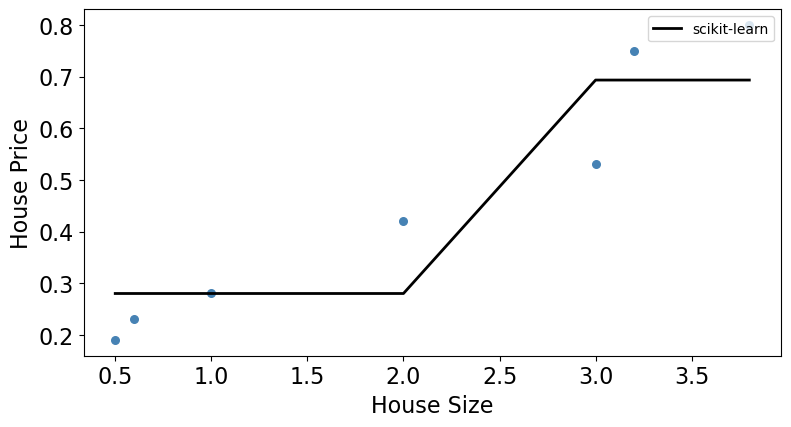

[Text(0.5, 0.75, 'x[0] <= 2.5\nsquared_error = 0.052\nsamples = 7\nvalue = 0.457'),
 Text(0.25, 0.25, 'squared_error = 0.008\nsamples = 4\nvalue = 0.28'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.014\nsamples = 3\nvalue = 0.693'),
 Text(0.625, 0.5, '  False')]

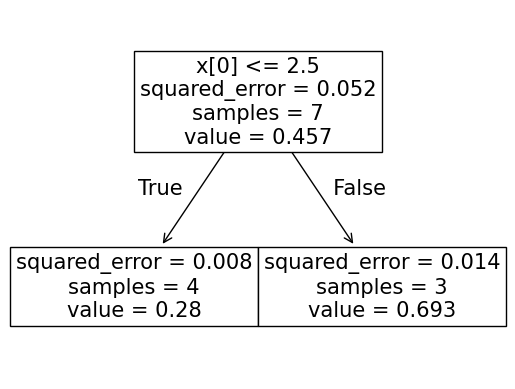

In [278]:
# Hyperparameters
CRITERION = 'squared_error'
MAX_DEPTH = 1

# Input (Lecture 9 housing prices example)
S = np.array([0.6, 1.0, 2.0, 3.0, 3.2, 3.8, 0.5])  # House size (only this is used to predict)
# R = np.array([1, 3, 5, 4, 6, 7, 2])  # Number of rooms (this is unused)
P = np.array([0.23, 0.28, 0.42, 0.53, 0.75, 0.80, 0.19])  # Price

# Sort
sort_index = S.argsort()
S = S[sort_index]
# R = R[sort_index]
P = P[sort_index]

# Scikit decision tree regressor
decision_tree = DecisionTreeRegressor(criterion=CRITERION, max_depth=MAX_DEPTH)
# Focus on House Size
decision_tree.fit(S.reshape(-1,1), P) # Reshape necessary because tree expects 2D array
decision_tree_predicted = decision_tree.predict(S.reshape(-1,1))
print(f'House sizes: {S}')
print(f'Predicted prices: {decision_tree_predicted}')

# Plot
plt.figure(0, figsize=[9, 4.5])
plt.rcParams.update({'font.size': 16})
plt.scatter(S, P, c='steelblue', s=30)
plt.plot(S, decision_tree_predicted, color='black', lw=2, label='scikit-learn')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend(loc='upper right', ncol=3, fontsize=10)
plt.show()
plot_tree(decision_tree)

# Random Forests

### Random Forest Regressor

In [279]:
# Hyperparameters
CRITERION = 'squared_error'
MAX_DEPTH = 1
MIN_IMPURITY_DECREASE = 0
NO_OF_TREES = 100

# Input
X_train = np.array([[0.6, 1], [1.0, 3], [2.0, 5], [3.0, 4], [3.2, 6], [3.8, 7], [0.5, 2]])
y_train = np.array([0.23, 0.28, 0.42, 0.53, 0.75, 0.80, 0.19])
X_test = np.array([[0.6, 1], [1.0, 3], [2.0, 5], [3.0, 4], [3.2, 6], [3.8, 7], [0.5, 2]])
y_test = np.array([0.23, 0.28, 0.42, 0.53, 0.75, 0.80, 0.19])

random_forest = RandomForestRegressor(criterion=CRITERION, max_depth=MAX_DEPTH, n_estimators=NO_OF_TREES, min_impurity_decrease=MIN_IMPURITY_DECREASE)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('X_test =')
print(X_test)
print()
print('y_pred =')
print(y_pred)
print()
print('y_test =')
print(y_test)

X_test =
[[0.6 1. ]
 [1.  3. ]
 [2.  5. ]
 [3.  4. ]
 [3.2 6. ]
 [3.8 7. ]
 [0.5 2. ]]

y_pred =
[0.29107333 0.29597333 0.40895667 0.54920167 0.66991833 0.71368333
 0.29107333]

y_test =
[0.23 0.28 0.42 0.53 0.75 0.8  0.19]


### Random Forest Classifier

In [280]:
# Hyperparameters
CRITERION = 'gini'  # Or 'entropy'
MAX_DEPTH = 1
MIN_IMPURITY_DECREASE = 0
NO_OF_TREES = 100

# Input
X_train = np.array([
    [1.2, 3.4],
    [2.5, 1.8],
    [3.3, 4.4],
    [0.5, 2.2],
    [4.1, 3.0]
])
y_train = np.array([0, 1, 0, 1, 0])
X_test = np.array([
    [1.2, 3.4],
    [2.5, 1.8],
    [3.3, 4.4],
    [0.5, 2.2],
    [4.1, 3.0]
])
y_test = np.array([0, 1, 0, 1, 0])

random_forest = RandomForestClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, min_impurity_decrease=MIN_IMPURITY_DECREASE, n_estimators=NO_OF_TREES)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('X_test =')
print(X_test)
print()
print('y_pred =')
print(y_pred)
print()
print('y_test =')
print(y_test)

X_test =
[[1.2 3.4]
 [2.5 1.8]
 [3.3 4.4]
 [0.5 2.2]
 [4.1 3. ]]

y_pred =
[0 1 0 1 0]

y_test =
[0 1 0 1 0]
